In [46]:
%matplotlib inline
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

# let's again start with a population
pop = np.random.rand(3, 1000)
pop[2] = pop[2] > .5


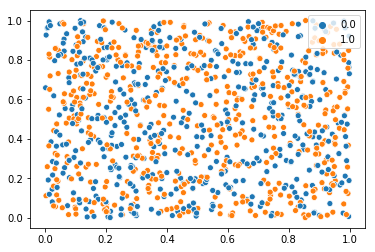

In [47]:
# we notice that there is no pattern between 
sns.scatterplot(x=pop[0], y=pop[1], hue=pop[2])

In [48]:
sample = pop[:, np.random.choice(1000, 20)]

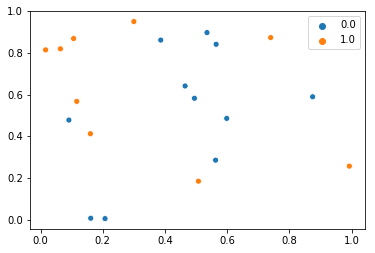

In [49]:
sns.scatterplot(x=sample[0], y=sample[1], hue=sample[2])

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dtc = DecisionTreeClassifier(max_depth=3)

In [51]:
dtc.fit(sample[:2].T, sample[2])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [52]:
# looks like we get a pretty good accuracy, let's go ahead and get the confidence interval
dtc.score(sample[:2].T, sample[2])

0.9

so we are 95% confident that we will be more than 75% accurate on an IID sample from the population right?

/Users/tucker/Desktop/data-science-foundations-master/env/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


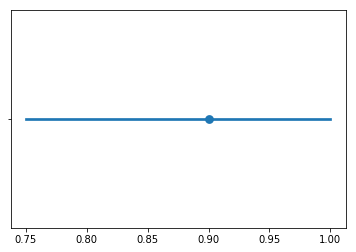

In [53]:
# then ask what the problem is
# we are doing bootstrapping correctly
# but we are asking the wrong question
# we are asking - how well will our model 
# perform on data it has already seen

sns.pointplot(dtc.predict(sample[:2].T) == sample[2])

The problem here is that we have forgotten a couple of steps. Are we 95% accurate that our pattern is correct for and IID sample from the population? Well let's test this out:

/Users/tucker/Desktop/data-science-foundations-master/env/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


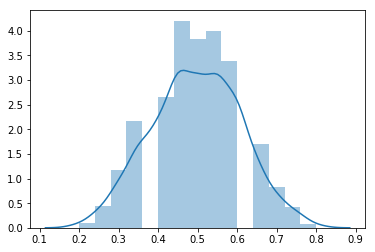

In [55]:


sample_accuracy = []

for _ in range(999):
    new_sample = pop[:, np.random.choice(1000, 20)]
    sample_accuracy.append(dtc.score(new_sample[:2].T, new_sample[2]))

sns.distplot(sample_accuracy)

This looks more like a 50% accuracy? That makes sense right? There was not really any pattern in the data to begin with. Well why was our confidence interval incorrect? 

Well it's because we were asking a different question: if we looked for a pattern in the sample, what would the accuracy of that sample be on that sample.

Let's use the population to check to see if this makes sense:

/Users/tucker/Desktop/data-science-foundations-master/env/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


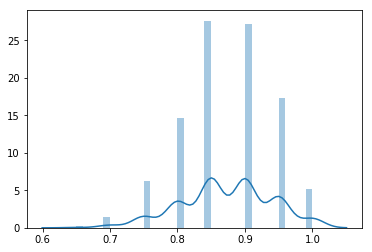

In [56]:
sample_accuracy = []

for _ in range(999):
    new_sample = pop[:, np.random.choice(1000, 20)]
    dtc.fit(new_sample[:2].T, new_sample[2])
    sample_accuracy.append(dtc.score(new_sample[:2].T, new_sample[2]))

sns.distplot(sample_accuracy)

Looks like yes 95% of the samples from the population actually fit in the above interval.

# Solution to this problem